In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix

import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore scikit-learn ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [51]:
df = pd.read_csv("df_final.csv")
df

,country,code,year,stress,agriculture_water,industry_water,domestic_water,water_per_capita,urban_population,state_capacity,cattle,total_withdrawals,cereal_yield,control_of_corruption,hydro_electricity,permanent_cropland,population_density,ln_stress
0,Afghanistan,AFG,2000,54.76,0.989050,0.006161,0.004577,0.007439,0.150751,0.213500,0.016537,0.030923,0.021020,0.133944,0.320168,0.005931,0.003636,4.002960
1,Afghanistan,AFG,2001,54.76,0.988170,0.006562,0.005056,0.007384,0.151743,0.195108,0.014174,0.030923,0.026476,0.143635,0.320168,0.005985,0.003665,4.002960
2,Afghanistan,AFG,2002,54.76,0.987291,0.006961,0.005535,0.006922,0.152745,0.185438,0.019679,0.030923,0.044531,0.138723,0.320168,0.005985,0.003922,4.002960
3,Afghanistan,AFG,2003,54.76,0.986414,0.007360,0.006013,0.006419,0.153748,0.096132,0.017978,0.030923,0.038764,0.117124,0.320168,0.005985,0.004245,4.002960
4,Afghanistan,AFG,2004,54.76,0.985538,0.007758,0.006489,0.006171,0.155350,0.091771,0.019585,0.030923,0.035409,0.115623,0.320168,0.005985,0.004424,4.002960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,Zimbabwe,ZWE,2011,32.70,0.807948,0.042543,0.149057,0.002896,0.269950,0.444841,0.072318,0.005297,0.015060,0.098218,0.564251,0.009032,0.004111,3.487375
2392,Zimbabwe,ZWE,2012,32.49,0.804082,0.037965,0.157488,0.002844,0.267977,0.454824,0.072518,0.005264,0.018008,0.108391,0.585590,0.009032,0.004190,3.480932
2393,Zimbabwe,ZWE,2013,32.28,0.800167,0.033329,0.166025,0.002783,0.266016,0.448678,0.072593,0.005230,0.017268,0.099601,0.521946,0.009032,0.004286,3.474448
2394,Zimbabwe,ZWE,2014,32.08,0.796202,0.028634,0.174672,0.002722,0.264381,0.488320,0.059065,0.005197,0.021703,0.103153,0.541594,0.009032,0.004386,3.468233


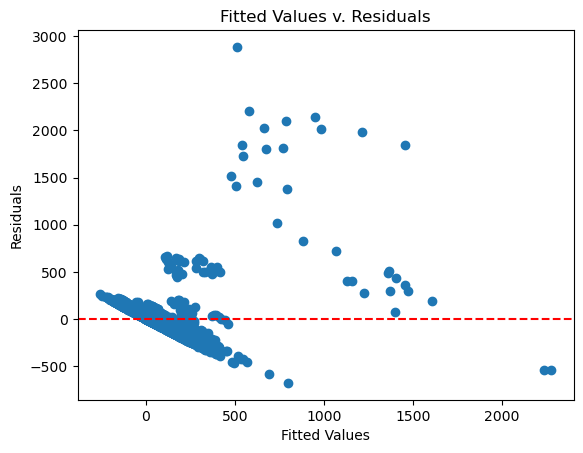

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 stress   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     132.2
Date:                Thu, 04 Apr 2024   Prob (F-statistic):          2.89e-269
Time:                        19:54:27   Log-Likelihood:                -16199.
No. Observations:                2396   AIC:                         3.243e+04
Df Residuals:                    2382   BIC:                         3.251e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               405.2033    120.634      3.359      0.001     168.644     641.763
agriculture_water      -277.1904    118.907     -2.331      0.020    -510.363     -44.018
industry_water         -430.5344    119.423     -3.605      0.000    -664.717    -196.351
domestic_water         -297.4747    115.871     -2.567      0.010    -524.693     -70.257
water_per_capita       -301.7189     41.073     -7.346      0.000    -382.262    -221.176
urban_population        323.1235     24.136     13.388      0.000     275.795     370.452
state_capacity         -768.6606     53.204    -14.447      0.000    -872.992    -664.329
cattle                 -223.2895     55.701     -4.009      0.000    -332.518    -114.062
total_withdrawals       119.7548     66.244      1.808      0.071     -10.148     249.658
cereal_yield           2279.3527     71.409     31.920      0.000    2139.323    2419.382
control_of_corruption   138.9290     38.828      3.578      0.000      62.789     215.069
hydro_electricity        16.1675     18.321      0.882      0.378     -19.760      52.095
permanent_cropland     -135.6045     28.536     -4.752      0.000    -191.562     -79.647
population_density       94.6499     61.613      1.536      0.125     -26.171     215.471
==============================================================================
Omnibus:                     2708.326   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           304997.171
Skew:                           5.676   Prob(JB):                         0.00
Kurtosis:                      57.094   Cond. No.                         82.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
model_all_data_no_transformation = smf.ols(formula = 'stress~agriculture_water+industry_water+domestic_water+water_per_capita+urban_population+state_capacity+cattle+total_withdrawals+cereal_yield+control_of_corruption+hydro_electricity+permanent_cropland+population_density', data = df).fit()
plt.scatter(model_all_data_no_transformation.fittedvalues, model_all_data_no_transformation.resid)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values v. Residuals')
plt.show()
model_all_data_no_transformation.summary()

In [53]:
# log transformation
df['ln_stress'] = np.log(df['stress'])

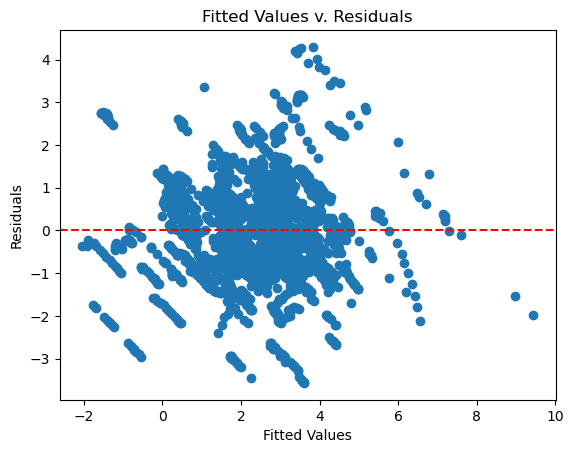

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ln_stress   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     267.2
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:54:27   Log-Likelihood:                -3806.8
No. Observations:                2396   AIC:                             7642.
Df Residuals:                    2382   BIC:                             7723.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.1102      0.684     -0.161      0.872      -1.452       1.232
agriculture_water         3.4094      0.675      5.054      0.000       2.086       4.732
industry_water            1.4726      0.678      2.173      0.030       0.144       2.801
domestic_water           -0.7583      0.657     -1.153      0.249      -2.047       0.531
water_per_capita         -5.2154      0.233    -22.379      0.000      -5.672      -4.758
urban_population          1.6592      0.137     12.116      0.000       1.391       1.928
state_capacity           -0.2122      0.302     -0.703      0.482      -0.804       0.380
cattle                   -1.8940      0.316     -5.993      0.000      -2.514      -1.274
total_withdrawals         1.9705      0.376      5.243      0.000       1.233       2.708
cereal_yield              7.1126      0.405     17.555      0.000       6.318       7.907
control_of_corruption    -0.0206      0.220     -0.094      0.925      -0.453       0.411
hydro_electricity        -1.5980      0.104    -15.372      0.000      -1.802      -1.394
permanent_cropland       -1.1674      0.162     -7.211      0.000      -1.485      -0.850
population_density        4.5679      0.350     13.067      0.000       3.882       5.253
==============================================================================
Omnibus:                       48.052   Durbin-Watson:                   0.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.706
Skew:                           0.241   Prob(JB):                     8.90e-15
Kurtosis:                       3.644   Cond. No.                         82.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
model_all_data = smf.ols(formula = 'ln_stress~agriculture_water+industry_water+domestic_water+water_per_capita+urban_population+state_capacity+cattle+total_withdrawals+cereal_yield+control_of_corruption+hydro_electricity+permanent_cropland+population_density', data = df).fit()
plt.scatter(model_all_data.fittedvalues, model_all_data.resid)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values v. Residuals')
plt.show()
model_all_data.summary()

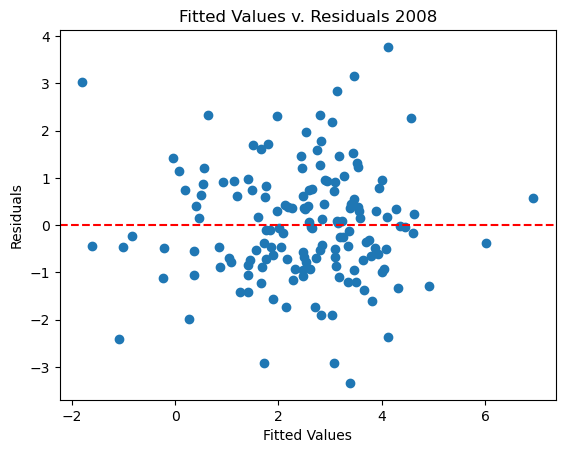

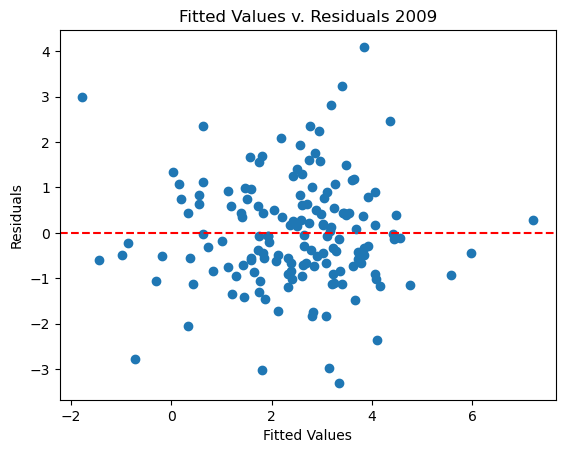

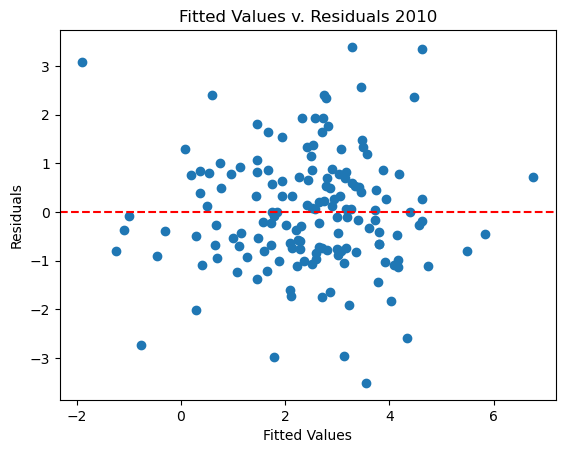

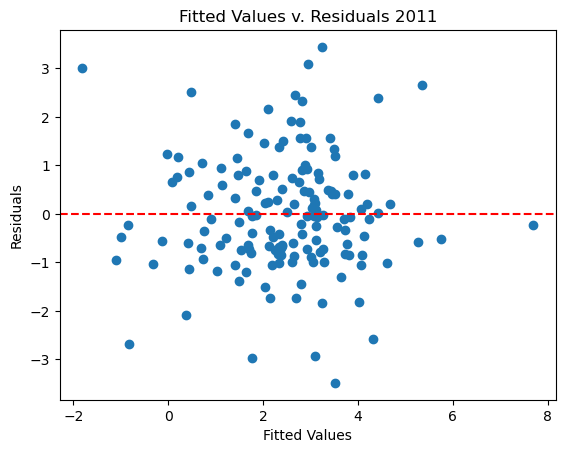

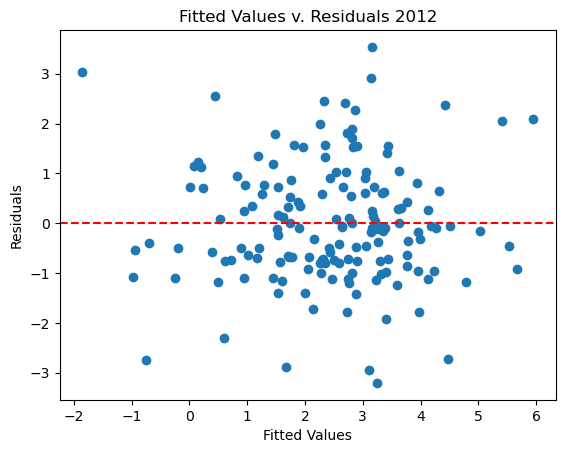

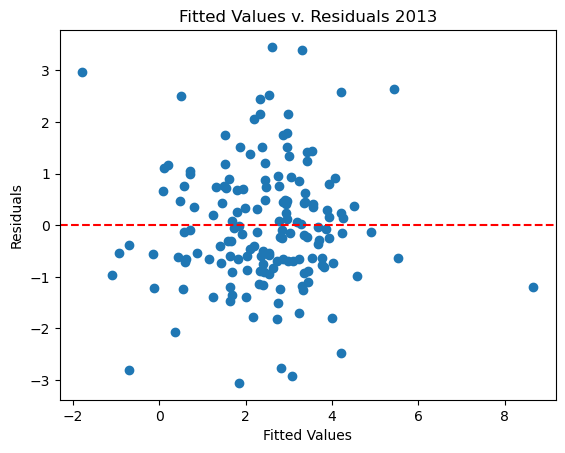

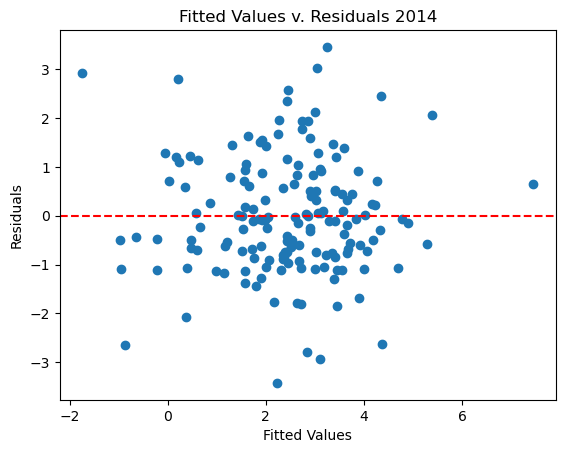

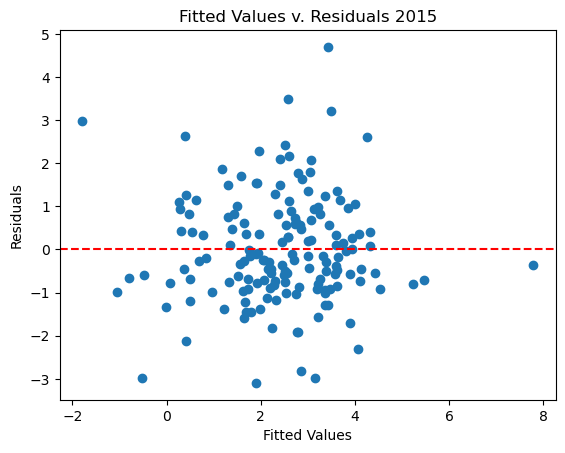

In [55]:
for i in range(2008, 2016, 1):
    df_year = df[df["year"] == i]
    model_year = smf.ols(formula = 'ln_stress~agriculture_water+industry_water+domestic_water+water_per_capita+urban_population+state_capacity+cattle+total_withdrawals+cereal_yield+control_of_corruption+hydro_electricity+permanent_cropland+population_density', data = df_year).fit()
    plt.scatter(model_year.fittedvalues, model_year.resid)
    plt.axhline(y = 0, color = 'r', linestyle = '--')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title(f'Fitted Values v. Residuals {i}')
    plt.show()

In [56]:
# Test Model with smf.ols
df_2015 = df[df["year"] == 2015]
df_2015_train, df_2015_test = train_test_split(df_2015, test_size=0.2, random_state=100)
model_2015 = smf.ols(formula = 'ln_stress~agriculture_water+industry_water+domestic_water+water_per_capita+urban_population+state_capacity+cattle+total_withdrawals+cereal_yield+control_of_corruption+hydro_electricity+permanent_cropland+population_density', data = df_2015_train).fit()
model_2015.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ln_stress   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     10.72
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           1.64e-14
Time:                        19:54:27   Log-Likelihood:                -206.77
No. Observations:                 127   AIC:                             441.5
Df Residuals:                     113   BIC:                             481.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.2190      3.710     -0.598      0.551      -9.569       5.131
agriculture_water         5.6052      3.633      1.543      0.126      -1.593      12.803
industry_water            3.7642      3.609      1.043      0.299      -3.385      10.914
domestic_water            1.7674      3.547      0.498      0.619      -5.260       8.795
water_per_capita         -5.0011      1.079     -4.634      0.000      -7.139      -2.863
urban_population          1.1087      0.655      1.694      0.093      -0.188       2.406
state_capacity           -0.7301      1.572     -0.465      0.643      -3.844       2.384
cattle                   -1.8031      1.414     -1.275      0.205      -4.605       0.999
total_withdrawals         2.1398      1.591      1.345      0.181      -1.013       5.293
cereal_yield              6.1286      1.351      4.537      0.000       3.453       8.805
control_of_corruption     0.5220      1.116      0.468      0.641      -1.689       2.733
hydro_electricity        -1.5242      0.509     -2.993      0.003      -2.533      -0.515
permanent_cropland       -0.6801      0.860     -0.790      0.431      -2.385       1.025
population_density        3.4150      1.354      2.523      0.013       0.733       6.097
==============================================================================
Omnibus:                       10.110   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               12.741
Skew:                           0.467   Prob(JB):                      0.00171
Kurtosis:                       4.239   Cond. No.                         94.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
y = df_2015_test["ln_stress"]
y_pred = model_2015.predict(df_2015_test)
r2_score(y, y_pred)

0.3717605001676154

In [58]:
df.columns

Index(['country', 'code', 'year', 'stress', 'agriculture_water',
       'industry_water', 'domestic_water', 'water_per_capita',
       'urban_population', 'state_capacity', 'cattle', 'total_withdrawals',
       'cereal_yield', 'control_of_corruption', 'hydro_electricity',
       'permanent_cropland', 'population_density', 'ln_stress'],
      dtype='object')

In [59]:
features_matrix = df[['year', 'agriculture_water',
       'industry_water', 'domestic_water', 'water_per_capita',
       'urban_population', 'state_capacity', 'cattle', 'total_withdrawals',
       'cereal_yield', 'control_of_corruption', 'hydro_electricity',
       'permanent_cropland', 'population_density']]

target_array = df['ln_stress']

In [60]:
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(df_2015[["agriculture_water","industry_water","domestic_water","water_per_capita","urban_population","state_capacity","cattle","total_withdrawals","cereal_yield","control_of_corruption","hydro_electricity","permanent_cropland","population_density"]])
# df_2015_features[["agriculture_water","industry_water","domestic_water","water_per_capita","urban_population","state_capacity","cattle","total_withdrawals","cereal_yield","control_of_corruption","hydro_electricity","permanent_cropland","population_density"]] = scaled_features

model_1 = LinearRegression()
cross_val = KFold(n_splits=5, shuffle=True, random_state=100)
test_fold_r2 = cross_val_score(model_1, features_matrix, target_array, cv=cross_val, scoring="r2")
print(f"Test fold R^2 Values: {test_fold_r2}")
print(f"Test fold R^2 Mean: {test_fold_r2.mean()}")
print(f"Test fold R^2 STD: {test_fold_r2.std()}")

Test fold R^2 Values: [0.59364218 0.58587946 0.60210839 0.58657747 0.58875439]
Test fold R^2 Mean: 0.5913923783541138
Test fold R^2 STD: 0.006007149214180662


,Lambda,Mean Test R^2
0,0.0,0.591392


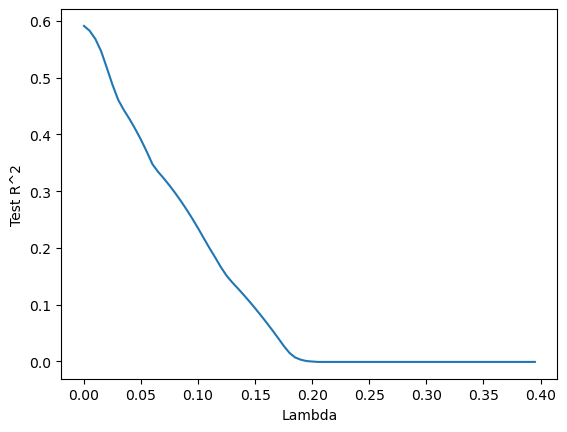

In [61]:
# LASSO Model with Cross Validation
data = []
for i in np.arange(0.0,0.4,0.005):
    temp_model = Lasso(i, max_iter=1000)
    cross_val = KFold(n_splits=5, shuffle=True, random_state=100)
    test_fold_r2 = cross_val_score(temp_model, features_matrix, target_array, cv=cross_val, scoring="r2")
    data.append([i, test_fold_r2.mean()])
results_lasso = pd.DataFrame(data, columns=['Lambda', "Mean Test R^2"])
plt.plot(results_lasso['Lambda'].values, results_lasso['Mean Test R^2'].values)
plt.xlabel("Lambda")
plt.ylabel("Test R^2")

results_lasso.nlargest(1,"Mean Test R^2")

In [62]:
# Best Lasso Model
model_lasso_0165 = Lasso(0.03, max_iter=1000)
cross_val = KFold(n_splits=5, shuffle=True, random_state=100)
test_fold_r2 = cross_val_score(model_lasso_0165, features_matrix, target_array, cv=cross_val, scoring="r2")
print(f"Test fold R^2 Values: {test_fold_r2}")
print(f"Test fold R^2 Mean: {test_fold_r2.mean()}")
print(f"Test fold R^2 STD: {test_fold_r2.std()}")

Test fold R^2 Values: [0.48240148 0.48334821 0.46759944 0.4518049  0.42024475]
Test fold R^2 Mean: 0.4610797558639991
Test fold R^2 STD: 0.023437266524505656


In [63]:
model_lasso_0165.fit(features_matrix, target_array)
df_slopes = pd.DataFrame({"Slope": model_lasso_0165.coef_.T}, index=features_matrix.columns)
df_slopes

,Slope
year,-0.011345
agriculture_water,1.666265
industry_water,0.000000
domestic_water,-1.598733
water_per_capita,-2.594202
urban_population,1.827245
state_capacity,0.000000
cattle,0.000000
total_withdrawals,0.000000
cereal_yield,0.324873


,Lambda,Mean Test R^2
21,2.05,0.574887


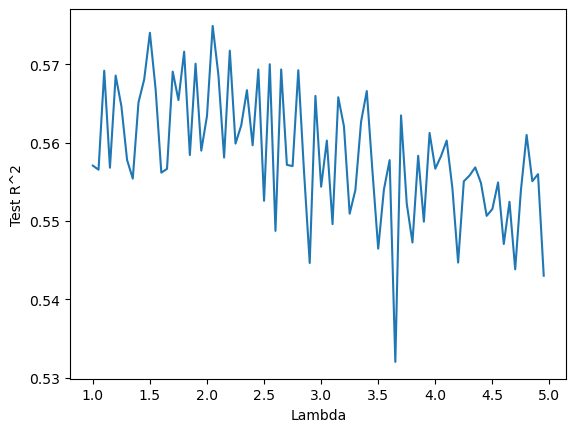

In [64]:
from sklearn.linear_model import HuberRegressor
# HUBER Model with Cross Validation
data = []
for i in np.arange(1,5,0.05):
    temp_model = HuberRegressor(epsilon=20, alpha=i,max_iter=1000)
    cross_val = KFold(n_splits=5, shuffle=True, random_state=100)
    test_fold_r2 = cross_val_score(temp_model, features_matrix, target_array, cv=cross_val, scoring="r2")
    data.append([i, test_fold_r2.mean()])
results_huber = pd.DataFrame(data, columns=['Lambda', "Mean Test R^2"])
plt.plot(results_huber['Lambda'].values, results_huber['Mean Test R^2'].values)
plt.xlabel("Lambda")
plt.ylabel("Test R^2")

results_huber.nlargest(1,"Mean Test R^2")

In [65]:
huber_mod = HuberRegressor(epsilon = 20, alpha = 1.39, max_iter = 1000)
huber_mod.fit(features_matrix, target_array)
print('coefficients:', huber_mod.coef_)
print('intercept:', huber_mod.intercept_)

coefficients: [ 5.71965936e-04  2.10265909e+00  2.23651613e-01 -1.86133413e+00
 -5.55874453e+00  1.72488011e+00 -1.74268130e-01 -1.37624445e+00
  1.50567237e+00  4.77234180e+00  3.76674033e-01 -1.78896766e+00
 -1.06777512e+00  3.84505686e+00]
intercept: 0.047584426419048025


\begin{align*}
\widehat{ln\_stress}= &+ 0.047584426419048025 \\
&+ 5.71965936 \times number\_of\_posts \\
&+ 2.10265909 \times account\_type_{personal} \\
&+ 0.223651613 \times account\_type_{creator} \\
&+ \hat{\beta}_4 \times account\_type_{business} \\
&+ \hat{\beta}_5 \times have\_profile\_picture_{yes} \\
&+ \hat{\beta}_6 \times have\_profile\_picture_{no}
\end{align*}

In [66]:
model_huber_1075 = HuberRegressor(epsilon=1.075,max_iter=20)
cross_val = KFold(n_splits=5, shuffle=True, random_state=100)
test_fold_r2 = cross_val_score(model_huber_1075, features_matrix, target_array, cv=cross_val, scoring="r2")
print(f"Test fold R^2 Values: {test_fold_r2}")
print(f"Test fold R^2 Mean: {test_fold_r2.mean()}")
print(f"Test fold R^2 STD: {test_fold_r2.std()}")

Test fold R^2 Values: [0.13464377 0.11746686 0.15011948 0.14015953 0.09091558]
Test fold R^2 Mean: 0.1266610425355745
Test fold R^2 STD: 0.0207774058129319


In [67]:
model_huber_1075.fit(features_matrix, target_array)
df_slopes = pd.DataFrame({"Slope": model_huber_1075.coef_.T}, index=features_matrix.columns)
df_slopes

,Slope
year,0.000764
agriculture_water,0.663171
industry_water,-0.124033
domestic_water,-0.559462
water_per_capita,-0.318996
urban_population,0.364310
state_capacity,0.210310
cattle,0.112669
total_withdrawals,0.234890
cereal_yield,0.132256


In [70]:
df['high_stress'] = 1 * (df.loc[:, 'stress'] >= 40)

In [73]:
# Define the number of folds for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize an array to store the accuracy scores for each fold
accuracy_scores = []

# Define the formula for the logistic regression model
formula = 'high_stress ~ agriculture_water + industry_water + domestic_water + water_per_capita + urban_population + state_capacity + cattle + total_withdrawals + cereal_yield + control_of_corruption + hydro_electricity + permanent_cropland + population_density'

# Iterate over each fold
for train_index, test_index in kf.split(df):
    # Split the data into training and test sets for this fold
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]
    
    # Fit the logistic regression model
    log_mod = smf.logit(formula=formula, data=train_data).fit()
    
    # Predict on the test set
    y_pred = log_mod.predict(test_data)
    
    # Convert probabilities to class labels (0 or 1)
    y_pred_class = np.where(y_pred > 0.5, 1, 0)
    
    # Calculate accuracy for this fold
    accuracy = np.mean(y_pred_class == test_data['high_stress'])
    
    # Store the accuracy score for this fold
    accuracy_scores.append(accuracy)

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
print("Mean accuracy:", mean_accuracy)


Optimization terminated successfully.
         Current function value: 0.322358
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.316638
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.315204
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.304376
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.321346
         Iterations 10
Mean accuracy: 0.8522477383437718


In [ ]:
0.8526652748782185